# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librarías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [13]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

# con 10 mín  fotos se generan 158 categorías
# con 40 mín  fotos se generan 19 categorías
# con 50 mín  fotos se generan 12 categorías

In [14]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (62, 47)


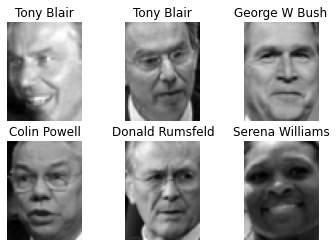

In [15]:
for i in range(6):
  img=X[i,:]
  img=img.reshape(W,H)
  plt.subplot(2,3,i+1)
  plt.title(target_name[y[i]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

### MODELO 2 - PCA

In [21]:
# some definitions
n_components = 200

In [22]:
# train/test split
X_train_image, X_test_image, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [23]:
# model
pca = PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(X_train_image)
eigenfaces=pca.components_.reshape((n_components,H,W))

In [24]:
# data transformation
X_train_pca=pca.transform(X_train_image)
X_test_pca=pca.transform(X_test_image)

In [25]:
# fit model
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid)
clf=clf.fit(X_train_pca,y_train_labels)

In [26]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [27]:
# predict
y_pred=clf.predict(X_test_pca)

In [28]:
# model's performance on test set
print(classification_report(y_test_labels,y_pred,target_names=target_names))
print(confusion_matrix(y_test_labels,y_pred,labels=range(classes)))

                           precision    recall  f1-score   support

             Ariel Sharon       0.50      0.50      0.50        14
    Arnold Schwarzenegger       0.67      0.33      0.44        12
             Colin Powell       0.72      0.90      0.80        52
          Donald Rumsfeld       0.86      0.80      0.83        30
            George W Bush       0.80      0.92      0.85       106
        Gerhard Schroeder       0.65      0.65      0.65        20
  Gloria Macapagal Arroyo       1.00      0.62      0.77         8
              Hugo Chavez       0.75      0.64      0.69        14
           Jacques Chirac       0.71      0.62      0.67         8
            Jean Chretien       0.71      0.45      0.56        11
        Jennifer Capriati       0.60      0.50      0.55         6
            John Ashcroft       0.78      0.70      0.74        10
        Junichiro Koizumi       1.00      0.92      0.96        12
               Laura Bush       0.88      0.78      0.82     

### BIBLIOGRAFÍA

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

https://github.com/harshitrai17152/Labeled-Faces-in-the-Wild.git
    